In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
df = pd.read_csv('loan_data_set.csv')

In [4]:
# view dataset number of features and labels
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# view dataset stat
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# check the unique of target
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [8]:
# Check the missing value and replace to nan
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History have missing value
# however, it is hard to replace value for gender, married because of categorical.
# for other non numerical columns, we can drop them
# for numerical columns, we can fill them by the mean

In [10]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)
df.Credit_History.fillna(df.Credit_History.mean(), inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            535 non-null    object 
 1   Gender             535 non-null    object 
 2   Married            535 non-null    object 
 3   Dependents         535 non-null    object 
 4   Education          535 non-null    object 
 5   Self_Employed      535 non-null    object 
 6   ApplicantIncome    535 non-null    int64  
 7   CoapplicantIncome  535 non-null    float64
 8   LoanAmount         535 non-null    float64
 9   Loan_Amount_Term   535 non-null    float64
 10  Credit_History     535 non-null    float64
 11  Property_Area      535 non-null    object 
 12  Loan_Status        535 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 58.5+ KB


In [13]:
# check again after fill and drop missing value
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Loan_ID is not necessary, so we drop unnecessary feature
df.drop("Loan_ID", axis=1, inplace=True)

In [15]:
# using label encoder to encode non numerical columns because we need numerical values to do classification
le = LabelEncoder()
cols = df.columns.tolist()
for column in cols:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             535 non-null    int64  
 1   Married            535 non-null    int64  
 2   Dependents         535 non-null    int64  
 3   Education          535 non-null    int64  
 4   Self_Employed      535 non-null    int64  
 5   ApplicantIncome    535 non-null    int64  
 6   CoapplicantIncome  535 non-null    float64
 7   LoanAmount         535 non-null    float64
 8   Loan_Amount_Term   535 non-null    float64
 9   Credit_History     535 non-null    float64
 10  Property_Area      535 non-null    int64  
 11  Loan_Status        535 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 54.3 KB


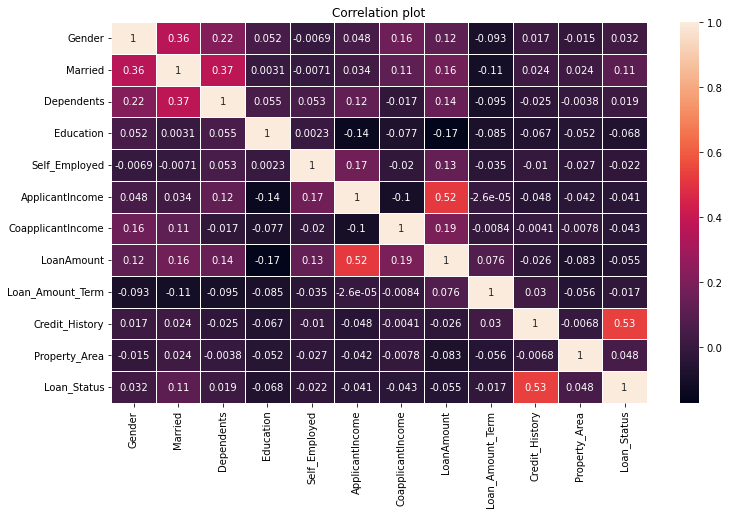

In [17]:
# find the correlation between two features
plt.figure(figsize=(12,7) )
corr_plot = sns.heatmap(df.corr(),annot = True,linewidths=1 )
plt.title("Correlation plot")
plt.show()

In [18]:
# we can see that loan_status and credit history, and loanAmount and applicantIncome have good correlation than others
# as loan_status is our target variable, so credit history is a good feature for us

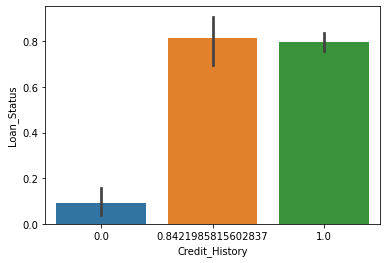

In [19]:
# Loan_Status by Credit_History
sns_grad = sns.barplot(x = df['Credit_History'], y = df['Loan_Status'], data = df)

In [20]:
# because Loan_Status and Credit_History has good correlation
# we found that most of the people has loan if they have credit history
# only few people in the dataset has no credit history and loan

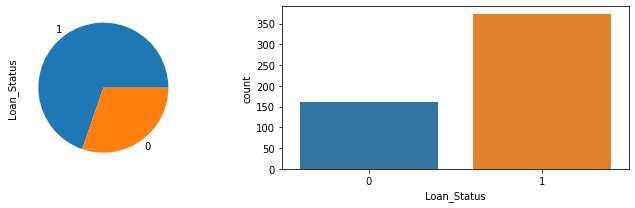

In [21]:
# cchart for distribution of income
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df["Loan_Status"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df["Loan_Status"])
plt.tight_layout()
plt.show()

In [22]:
# we found that the number of people have loan is higher than the number of people has not loan in this dataset

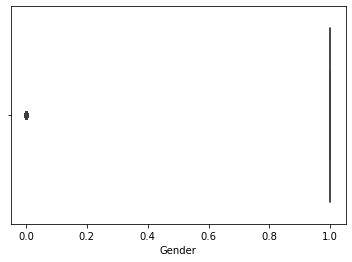

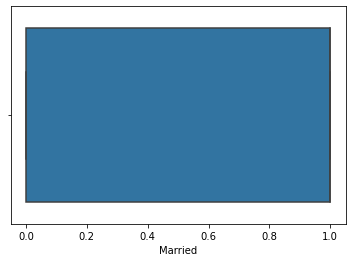

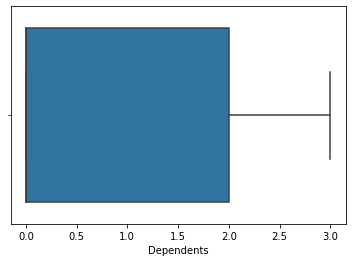

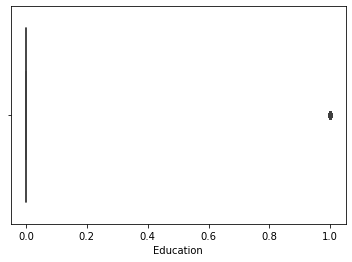

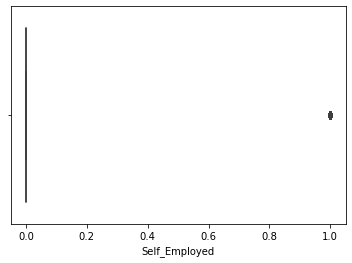

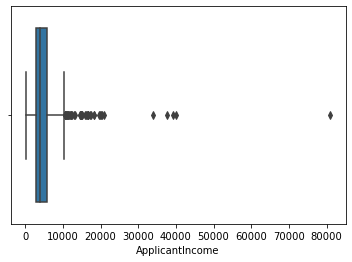

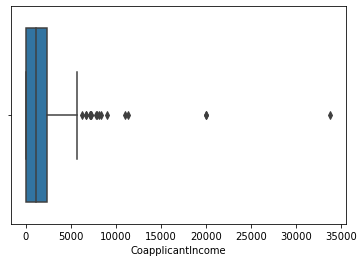

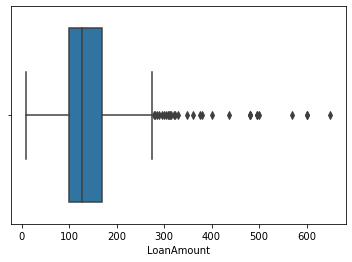

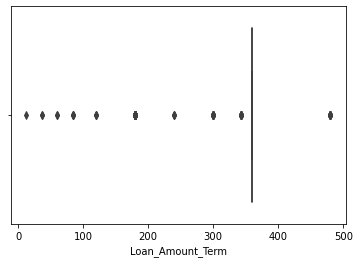

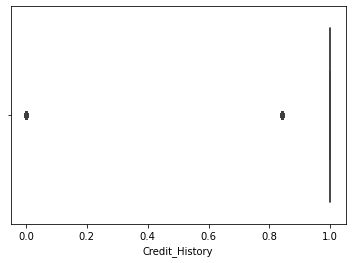

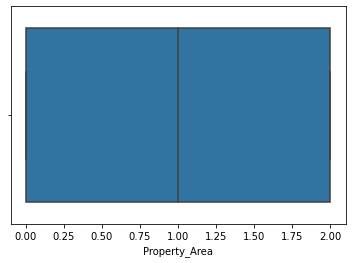

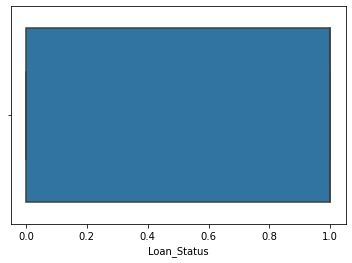

In [23]:
# Check the outliers
numeric = [col for col in df.columns if df[col].dtypes != object]
for i in numeric:
  sns.boxplot(x = df[i])
  plt.show()

In [24]:
# we can see that applicantIncome, coapplicantIncome has some outliners

In [25]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
# check vif
numeric = [col for col in df.columns if df[col].dtypes != object]
dt = df[numeric]
calc_vif(dt)

,variables,VIF
0,Gender,6.011390
1,Married,3.797861
2,Dependents,1.886181
3,Education,1.310840
4,Self_Employed,1.197135
5,ApplicantIncome,2.854259
6,CoapplicantIncome,1.587018
7,LoanAmount,6.380759
8,Loan_Amount_Term,10.717562
9,Credit_History,9.072837


In [27]:
# we can see vif of each features is not bad of each other, so we dont need to drop them.

In [28]:
# use Loan_Status as the target
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [29]:
# set the training size to 0.6 and testing size to 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        64
           1       0.81      0.97      0.88       150

    accuracy                           0.82       214
   macro avg       0.83      0.72      0.74       214
weighted avg       0.82      0.82      0.80       214



In [32]:
# we can see the recall of class 0 is only 0.47, it means the data is imbalance, but we have 0.82 which is a good model

In [33]:
# Get the best model by lasso or ridge
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"], "class_weight":["balanced"]}# l1 lasso l2 ridge
log_reg_cv=GridSearchCV(log_reg,grid,scoring="roc_auc",cv=10,n_jobs=-1, refit=True)
log_reg_cv.fit(X_train,y_train)

print("tuned best parameters: ",log_reg_cv.best_params_)
print("accuracy :",log_reg_cv.best_score_)

/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

tuned best parameters:  {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
accuracy : 0.7295849802371542


/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [34]:
# use the best parameters
best_model_logr = LogisticRegression(C=100, penalty='l2',class_weight='balanced')
best_model_logr.fit(X_train, y_train)
pred_logr = best_model_logr.predict(X_test)

/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# use the balanced class weight to see if increase the class 0

In [36]:
print(classification_report(y_test,pred_logr))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        64
           1       0.85      0.77      0.81       150

    accuracy                           0.74       214
   macro avg       0.70      0.73      0.71       214
weighted avg       0.76      0.74      0.75       214



In [37]:
# thus, we increased the recall of class 0

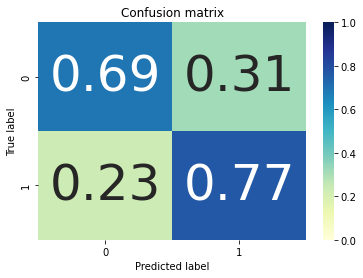

In [38]:
# Visualizing confusion matrixx

cm = confusion_matrix(y_test,pred_logr) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = best_model_logr.classes_, title='Confusion matrix')

In [39]:
# we got 0.69 and 0.77 for class 0 and class 1, the false positive and false negative ratio are low

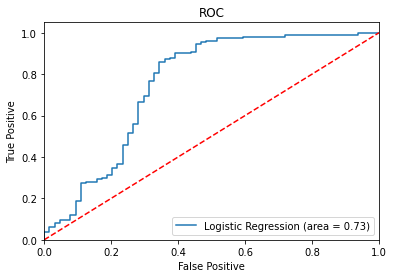

In [40]:
# Get roc auc of the model
roc_auc = roc_auc_score(y_test, best_model_logr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model_logr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [41]:
# we can see the ROC of the model has 0.73 area, which is not bad.

In [42]:
# Running Log loss on training
pred_proba = best_model_logr.predict_proba(X_train)
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = best_model_logr.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.5357110354406069
The Log Loss on Testing Dataset is:  0.5698007277042818


In [43]:
# we can see the log loss of training is 0.54 and testing is 0.57, they means we get good result for log loss

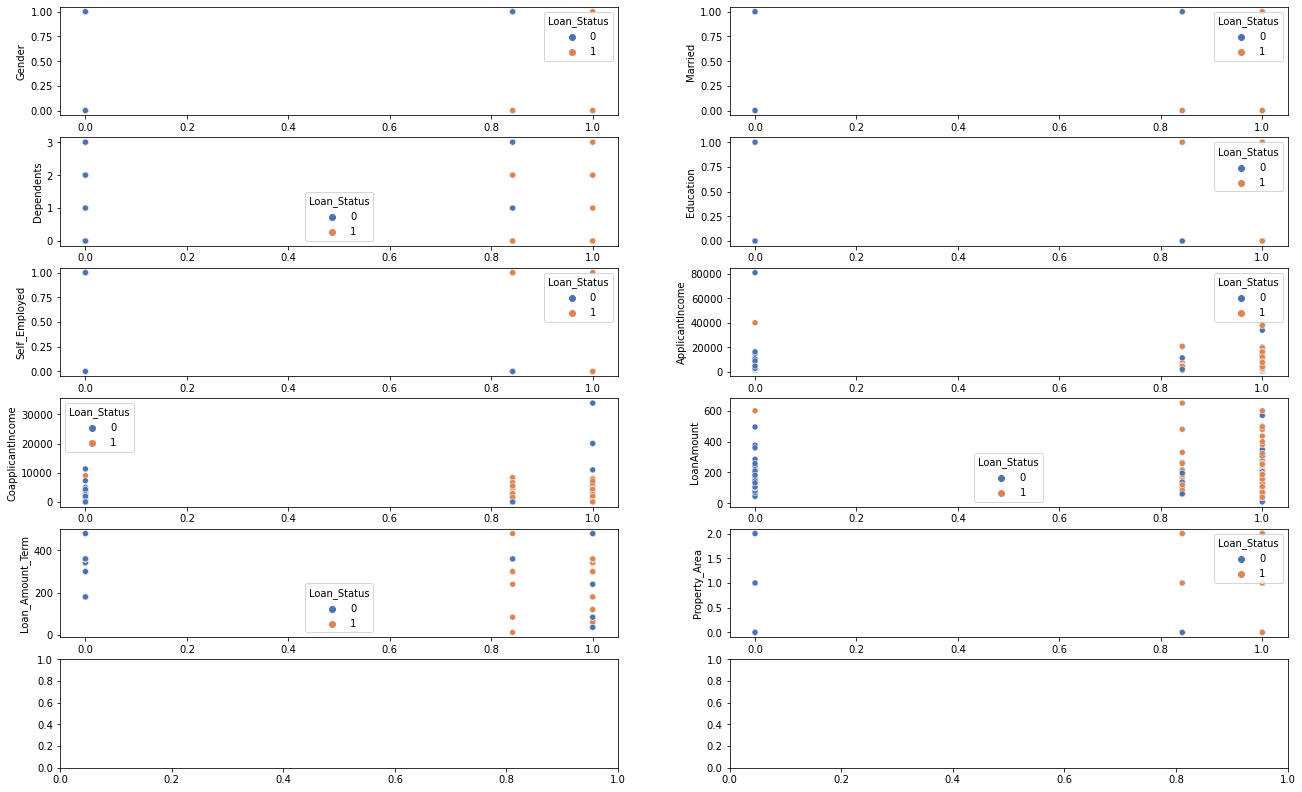

In [44]:
'''let’s check if our data is linearly separable or not. This will give an initial inference to decide what type of kernel will best classify the data.
For simplicity, let’s plot every feature against Credit_History and color the data points concerning their class'''

#visualizing datapoints separability
fig, axes = plt.subplots(6, 2, figsize=(22,14))
axes = [ax for axes_rows in axes for ax in axes_rows]
columns = list(df.columns)
columns.remove('Loan_Status')
columns.remove('Credit_History')
#looping through every columns of data
#and plotting against Credit_History
for i, col in enumerate(columns):
   sns.scatterplot(data=df, x='Credit_History', y=col, hue='Loan_Status',         palette="deep", ax=axes[i])

In [45]:
# we can see our data is linearly separable

In [46]:
svc = SVC(kernel='linear', random_state = 10, class_weight='balanced')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [47]:
print("Support vector machine model accuracy(in %):", metrics.accuracy_score(y_test, svc_pred)*100)

Support vector machine model accuracy(in %): 64.01869158878505


In [48]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        64
           1       0.76      0.72      0.74       150

    accuracy                           0.64       214
   macro avg       0.58      0.59      0.58       214
weighted avg       0.65      0.64      0.65       214



In [49]:
# we can see the class of 0 and 1 are balanced but the accuracy is only 0.64, it is bad than logistic regression.
# because the accuracy of class 0 is low, which result in the low final accuracy

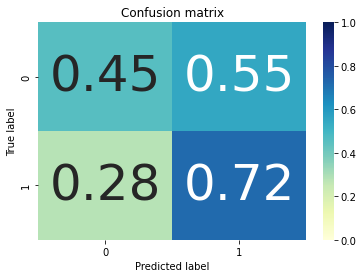

In [50]:
# Visualizing confusion matrix

cm = confusion_matrix(y_test,svc_pred) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = svc.classes_, title='Confusion matrix')

K-Nearest Neighbors Accuracy model Maximum accuracy:- 0.719626168224299 at K = 14


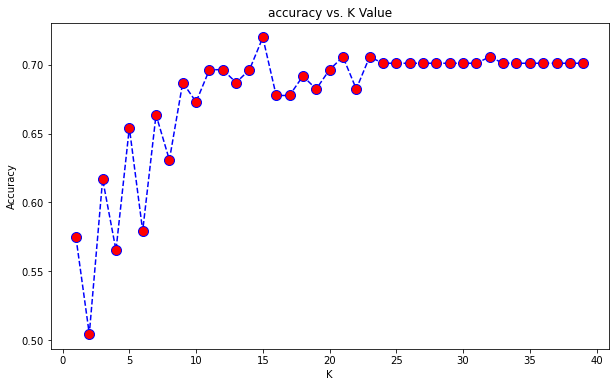

In [51]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    neigh_pred = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, neigh_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("K-Nearest Neighbors Accuracy model Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [52]:
# we can see that the maximum accuracy at K=14

In [53]:
neigh = KNeighborsClassifier(n_neighbors = 14)
neigh.fit(X_train,y_train)
neigh_pred = neigh.predict(X_test)

In [54]:
print(classification_report(y_test,neigh_pred))

              precision    recall  f1-score   support

           0       0.48      0.20      0.29        64
           1       0.73      0.91      0.81       150

    accuracy                           0.70       214
   macro avg       0.60      0.55      0.55       214
weighted avg       0.65      0.70      0.65       214



In [55]:
# we can see that the class 0 has 0.2 accuracy only in recall, but class 1 has 0.91 in recall.
# Because KNN is determined by a majority vote amongst the k-nearest neighbors
# If the training set were to be imbalanced, the probability that the k nearest neighbors of any random query point will belong to the class with more examples becomes higher. 
# So, the closest neighbor of the query point may still belong to the class with less examples
# Therefore, KNN is easy to affect by nearest. Because we have an imbalanced dataset, we cant do anything for class 0 in KNN
# So, KNN is not a good model for this dataset

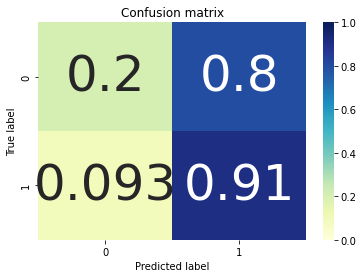

In [56]:
# Visualizing confusion matrix

cm = confusion_matrix(y_test,neigh_pred) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = neigh.classes_, title='Confusion matrix')

In [57]:
# we can see that KNN has high false negative 0.8 for this dataset, which is not a good model.

In [58]:
# Running Log loss on training
pred_proba = neigh.predict_proba(X_train)
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = neigh.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.5629465365652976
The Log Loss on Testing Dataset is:  0.6446790590560719


In [59]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             535 non-null    int64  
 1   Married            535 non-null    int64  
 2   Dependents         535 non-null    int64  
 3   Education          535 non-null    int64  
 4   Self_Employed      535 non-null    int64  
 5   ApplicantIncome    535 non-null    int64  
 6   CoapplicantIncome  535 non-null    float64
 7   LoanAmount         535 non-null    float64
 8   Loan_Amount_Term   535 non-null    float64
 9   Credit_History     535 non-null    float64
 10  Property_Area      535 non-null    int64  
 11  Loan_Status        535 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 70.5 KB


In [61]:
# Gender Male, Loan amount 65000, we want to predict this man will loan a car or not. we use mean for other unknown values.
X_new = np.array([
    [0, df.Married.mean(), df.Dependents.mean(), df.Education.mean(), df.Self_Employed.mean(),
     df.ApplicantIncome.mean(), df.CoapplicantIncome.mean(), 65000, df.Loan_Amount_Term.mean(),
     df.Credit_History.mean(), df.Property_Area.mean()]])

In [68]:
prediction = best_model_logr.predict(X_new)
if prediction[0] == 1:
    print("Yes. Logistic regression predicted he will loan")
else:
    print("No. Logistic regression predicted he will not loan")
print(prediction)

No. Logistic regression predicted he will not loan
[0]


In [69]:
prediction = svc.predict(X_new)
if prediction[0] == 1:
    print("Yes. SVC predicted he will loan")
else:
    print("No. SVC predicted he will not loan")
print(prediction)

Yes. SVC predicted he will loan
[1]


In [70]:
prediction = neigh.predict(X_new)
if prediction[0] == 1:
    print("Yes. KNN predicted he will loan")
else:
    print("No. KNN predicted he will not loan")
print(prediction)

Yes. KNN predicted he will loan
[1]


In [ ]:
# Therefore, Logistic regression predicted he will not loan, SVC predicted he will loan, KNN predicted he will loan